# The Law of large number

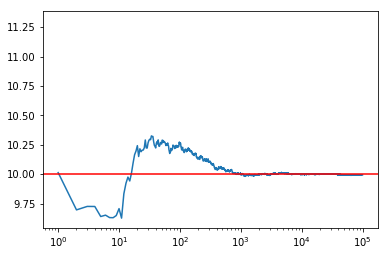

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.semilogx(pd.Series(np.random.normal(loc = 10, size=100000)).expanding(1).mean())
plt.axhline(10, color="r")

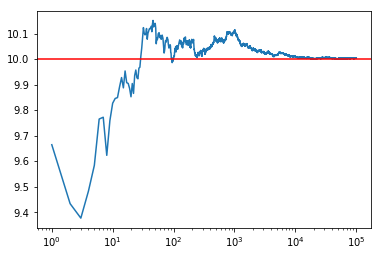

In [4]:
plt.semilogx(np.cumsum(np.random.normal(loc = 10, size=100000))/np.arange(1,100001))
plt.axhline(10, color="r")

# Probability distribution

## The uniform distribution

In [5]:
import scipy.stats as stats

uniform_data = stats.uniform.rvs(size=100000,
                                 loc=0,
                                 scale=10)

In [6]:
dir(stats.uniform)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_argcheck',
 '_argcheck_rvs',
 '_cdf',
 '_cdf_single',
 '_cdfvec',
 '_construct_argparser',
 '_construct_default_doc',
 '_construct_doc',
 '_ctor_param',
 '_entropy',
 '_fit_loc_scale_support',
 '_fitstart',
 '_isf',
 '_logcdf',
 '_logpdf',
 '_logsf',
 '_mom0_sc',
 '_mom1_sc',
 '_mom_integ0',
 '_mom_integ1',
 '_munp',
 '_nnlf',
 '_nnlf_and_penalty',
 '_open_support_mask',
 '_parse_args',
 '_parse_args_rvs',
 '_parse_args_stats',
 '_pdf',
 '_penalized_nnlf',
 '_ppf',
 '_ppf_single',
 '_ppf_to_solve',
 '_ppfvec',
 '_random_state',
 '_reduce_func',
 '_rvs',
 '_sf',
 '_size',
 '

- rvs: Random Variates
- pdf: Probability Density Function
- cdf: Cumulative Distribution Function
- sf: Survival Function (1-CDF)
- ppf: Percent Point Function (Inverse of CDF)
- isf: Inverse Survival Function (Inverse of SF)
- stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
- moment: non-central moments of the distribution

[The scipy stats package](https://docs.scipy.org/doc/scipy/reference/stats.html)

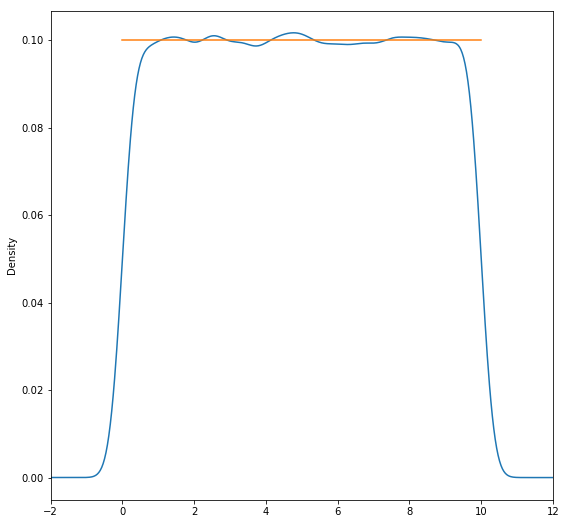

In [7]:
## The PDF

pd.Series(uniform_data).plot(kind="density", figsize=(9,9), xlim=(-2,12))

values = np.linspace(0,10, 1000)
plt.plot(values, stats.uniform.pdf(values, loc=0, scale=10))

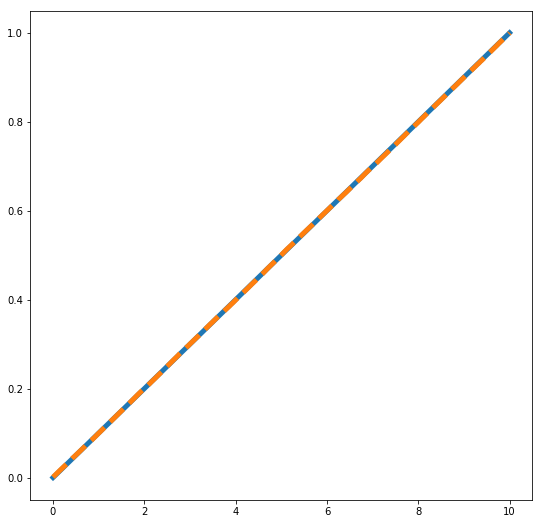

In [40]:
## The CDF

plt.plot(values, stats.uniform.cdf(values, loc=0, scale=10), lw=5)
distribution = np.histogram(uniform_data, bins= 1000, density=True)[0]
plt.plot(values, 10 * distribution.cumsum() / len(distribution), "--", lw=5)


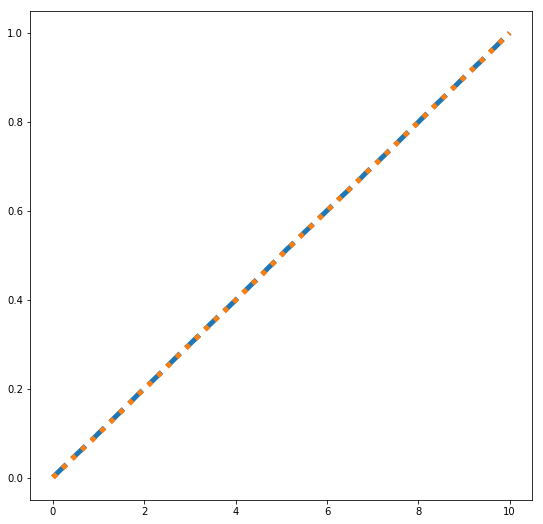

In [46]:
plt.plot(values, distribution.cumsum() / sum(distribution), "--", lw=5)
delta_x = values[1:] - values[:-1]
delta_x = np.insert(delta_x, 0, 0.)
plt.plot(values, (distribution * delta_x).cumsum(), ":", lw=5)

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

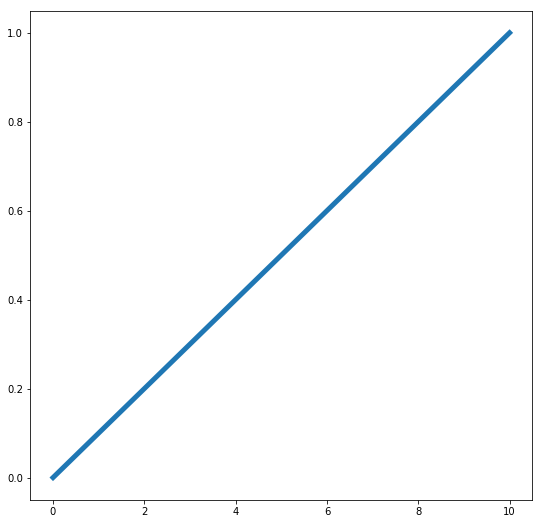

In [27]:
## The probability cutoff: the inverse CDF

unit_values = np.linspace(0,1, 1000)
plt.plot(stats.uniform.ppf(q=unit_values, loc=0, scale=10), unit_values, lw=5)

In [28]:
stats.norm.pdf(x=np.linspace(0,10, 100))
stats.chi2.pdf(x=np.linspace(0,10, 100), df=2)

array([ 0.5       ,  0.47537456,  0.45196195,  0.42970243,  0.40853921,
        0.3884183 ,  0.36928836,  0.35110058,  0.33380857,  0.31736821,
        0.30173755,  0.28687671,  0.27274778,  0.25931472,  0.24654324,
        0.23440077,  0.22285633,  0.21188046,  0.20144516,  0.19152381,
        0.1820911 ,  0.17312295,  0.16459649,  0.15648997,  0.14878271,
        0.14145503,  0.13448824,  0.12786458,  0.12156714,  0.11557985,
        0.10988744,  0.10447539,  0.09932988,  0.0944378 ,  0.08978666,
        0.08536459,  0.08116031,  0.07716309,  0.07336274,  0.06974956,
        0.06631433,  0.0630483 ,  0.05994311,  0.05699086,  0.05418401,
        0.0515154 ,  0.04897822,  0.046566  ,  0.04427259,  0.04209212,
        0.04001905,  0.03804808,  0.03617418,  0.03439257,  0.0326987 ,
        0.03108826,  0.02955714,  0.02810142,  0.0267174 ,  0.02540155,
        0.0241505 ,  0.02296107,  0.02183021,  0.02075506,  0.01973285,
        0.01876099,  0.017837  ,  0.01695851,  0.01612329,  0.01

## The Normal distribution

In [11]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1 - (prob_under_minus1 + prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.158655253931 0.158655253931 0.682689492137


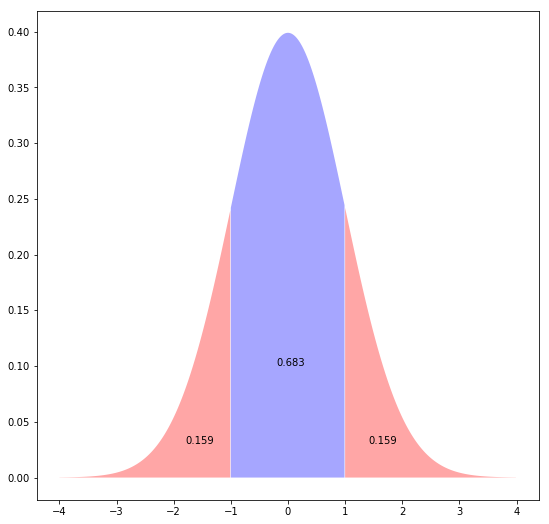

In [12]:
plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

## The binomial distribution

5     2456
4     2077
6     2066
7     1145
3     1145
8      481
2      435
1       92
9       86
10      10
0        7
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114d66eb8>]], dtype=object)

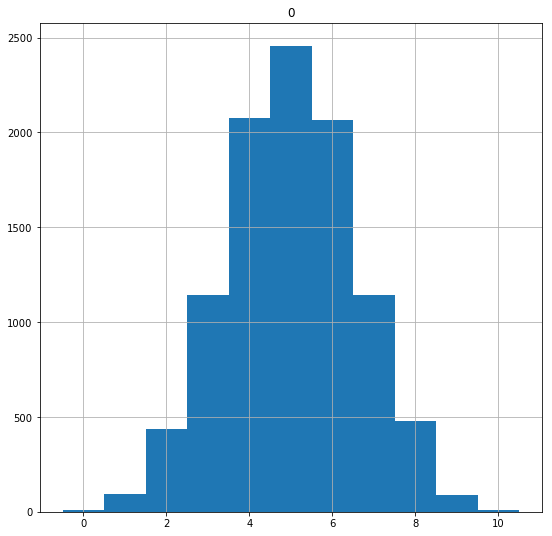

In [13]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print(pd.Series(fair_coin_flips).value_counts())

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

# Markov Chains

In [14]:
customers = ["UID" + str(i) for i in range(1000)]
customers

['UID0',
 'UID1',
 'UID2',
 'UID3',
 'UID4',
 'UID5',
 'UID6',
 'UID7',
 'UID8',
 'UID9',
 'UID10',
 'UID11',
 'UID12',
 'UID13',
 'UID14',
 'UID15',
 'UID16',
 'UID17',
 'UID18',
 'UID19',
 'UID20',
 'UID21',
 'UID22',
 'UID23',
 'UID24',
 'UID25',
 'UID26',
 'UID27',
 'UID28',
 'UID29',
 'UID30',
 'UID31',
 'UID32',
 'UID33',
 'UID34',
 'UID35',
 'UID36',
 'UID37',
 'UID38',
 'UID39',
 'UID40',
 'UID41',
 'UID42',
 'UID43',
 'UID44',
 'UID45',
 'UID46',
 'UID47',
 'UID48',
 'UID49',
 'UID50',
 'UID51',
 'UID52',
 'UID53',
 'UID54',
 'UID55',
 'UID56',
 'UID57',
 'UID58',
 'UID59',
 'UID60',
 'UID61',
 'UID62',
 'UID63',
 'UID64',
 'UID65',
 'UID66',
 'UID67',
 'UID68',
 'UID69',
 'UID70',
 'UID71',
 'UID72',
 'UID73',
 'UID74',
 'UID75',
 'UID76',
 'UID77',
 'UID78',
 'UID79',
 'UID80',
 'UID81',
 'UID82',
 'UID83',
 'UID84',
 'UID85',
 'UID86',
 'UID87',
 'UID88',
 'UID89',
 'UID90',
 'UID91',
 'UID92',
 'UID93',
 'UID94',
 'UID95',
 'UID96',
 'UID97',
 'UID98',
 'UID99',
 'UID100',

In [15]:
dates = pd.date_range("2013-01", "2017-01", freq="M")
dates

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
from itertools import product
customer_df = pd.DataFrame(list(product(customers, dates)), columns=['CustomerID', 'Date'])
customer_df

,CustomerID,Date
0,UID0,2013-01-31
1,UID0,2013-02-28
2,UID0,2013-03-31
3,UID0,2013-04-30
4,UID0,2013-05-31
5,UID0,2013-06-30
6,UID0,2013-07-31
7,UID0,2013-08-31
8,UID0,2013-09-30
9,UID0,2013-10-31


In [17]:
def choose_jump(x):
    x_temp = x.copy()
    probas = np.random.uniform(size=3) 
    probas /= sum(probas)
    x_temp["Jump"] = np.random.choice([-1, 0, 1], p=probas, size=x.shape[0])
    return x_temp

customer_df = customer_df.groupby(["CustomerID"]).apply(choose_jump)
customer_df

CustomerID       Date  Jump
CustomerID                                  
UID0       0           UID0 2013-01-31     0
           1           UID0 2013-02-28     0
           2           UID0 2013-03-31    -1
           3           UID0 2013-04-30     1
           4           UID0 2013-05-31     0
           5           UID0 2013-06-30    -1
           6           UID0 2013-07-31    -1
           7           UID0 2013-08-31    -1
           8           UID0 2013-09-30     1
           9           UID0 2013-10-31     0
           10          UID0 2013-11-30    -1
           11          UID0 2013-12-31     1
           12          UID0 2014-01-31    -1
           13          UID0 2014-02-28     1
           14          UID0 2014-03-31    -1
           15          UID0 2014-04-30     0
           16          UID0 2014-05-31     1
           17          UID0 2014-06-30     1
           18          UID0 2014-07-31     0
           19          UID0 2014-08-31    -1
           20          UID0 2014-09-30    -1
           21          UID0 2014-10-31    -1
           22          UID0 2014-11-30    -1
           23          UID0 2014-12-31     0
           24          UID0 2015-01-31    -1
           25          UID0 2015-02-28     0
           26          UID0 2015-03-31     1
           27          UID0 2015-04-30    -1
           28          UID0 2015-05-31     1
           29          UID0 2015-06-30     1
...                     ...        ...   ...
UID999     47970     UID999 2014-07-31     1
           47971     UID999 2014-08-31     1
           47972     UID999 2014-09-30     0
           47973     UID999 2014-10-31     0
           47974     UID999 2014-11-30    -1
           47975     UID999 2014-12-31     0
           47976     UID999 2015-01-31    -1
           47977     UID999 2015-02-28     1
           47978     UID999 2015-03-31     0
           47979     UID999 2015-04-30    -1
           47980     UID999 2015-05-31     0
           47981     UID999 2015-06-30     1
           47982     UID999 2015-07-31     0
           47983     UID999 2015-08-31     0
           47984     UID999 2015-09-30     0
           47985     UID999 2015-10-31     0
           47986     UID999 2015-11-30     1
           47987     UID999 2015-12-31     0
           47988     UID999 2016-01-31     0
           47989     UID999 2016-02-29    -1
           47990     UID999 2016-03-31     1
           47991     UID999 2016-04-30    -1
           47992     UID999 2016-05-31     0
           47993     UID999 2016-06-30     1
           47994     UID999 2016-07-31     0
           47995     UID999 2016-08-31    -1
           47996     UID999 2016-09-30    -1
           47997     UID999 2016-10-31     1
           47998     UID999 2016-11-30     1
           47999     UID999 2016-12-31     0

[48000 rows x 3 columns]

In [18]:
customer_df["State"] = customer_df.groupby("CustomerID").cumsum()["Jump"]
customer_df

/Users/damien.benveniste/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'CustomerID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


CustomerID       Date  Jump  State
CustomerID                                         
UID0       0           UID0 2013-01-31     0      0
           1           UID0 2013-02-28     0      0
           2           UID0 2013-03-31    -1     -1
           3           UID0 2013-04-30     1      0
           4           UID0 2013-05-31     0      0
           5           UID0 2013-06-30    -1     -1
           6           UID0 2013-07-31    -1     -2
           7           UID0 2013-08-31    -1     -3
           8           UID0 2013-09-30     1     -2
           9           UID0 2013-10-31     0     -2
           10          UID0 2013-11-30    -1     -3
           11          UID0 2013-12-31     1     -2
           12          UID0 2014-01-31    -1     -3
           13          UID0 2014-02-28     1     -2
           14          UID0 2014-03-31    -1     -3
           15          UID0 2014-04-30     0     -3
           16          UID0 2014-05-31     1     -2
           17          UID0 2014-06-30     1     -1
           18          UID0 2014-07-31     0     -1
           19          UID0 2014-08-31    -1     -2
           20          UID0 2014-09-30    -1     -3
           21          UID0 2014-10-31    -1     -4
           22          UID0 2014-11-30    -1     -5
           23          UID0 2014-12-31     0     -5
           24          UID0 2015-01-31    -1     -6
           25          UID0 2015-02-28     0     -6
           26          UID0 2015-03-31     1     -5
           27          UID0 2015-04-30    -1     -6
           28          UID0 2015-05-31     1     -5
           29          UID0 2015-06-30     1     -4
...                     ...        ...   ...    ...
UID999     47970     UID999 2014-07-31     1      5
           47971     UID999 2014-08-31     1      6
           47972     UID999 2014-09-30     0      6
           47973     UID999 2014-10-31     0      6
           47974     UID999 2014-11-30    -1      5
           47975     UID999 2014-12-31     0      5
           47976     UID999 2015-01-31    -1      4
           47977     UID999 2015-02-28     1      5
           47978     UID999 2015-03-31     0      5
           47979     UID999 2015-04-30    -1      4
           47980     UID999 2015-05-31     0      4
           47981     UID999 2015-06-30     1      5
           47982     UID999 2015-07-31     0      5
           47983     UID999 2015-08-31     0      5
           47984     UID999 2015-09-30     0      5
           47985     UID999 2015-10-31     0      5
           47986     UID999 2015-11-30     1      6
           47987     UID999 2015-12-31     0      6
           47988     UID999 2016-01-31     0      6
           47989     UID999 2016-02-29    -1      5
           47990     UID999 2016-03-31     1      6
           47991     UID999 2016-04-30    -1      5
           47992     UID999 2016-05-31     0      5
           47993     UID999 2016-06-30     1      6
           47994     UID999 2016-07-31     0      6
           47995     UID999 2016-08-31    -1      5
           47996     UID999 2016-09-30    -1      4
           47997     UID999 2016-10-31     1      5
           47998     UID999 2016-11-30     1      6
           47999     UID999 2016-12-31     0      6

[48000 rows x 4 columns]

In [19]:
## Only between 0 and 7
customer_df["State_clip"] = np.clip(customer_df["State"], 0, 7)
customer_df

CustomerID       Date  Jump  State  State_clip
CustomerID                                                     
UID0       0           UID0 2013-01-31     0      0           0
           1           UID0 2013-02-28     0      0           0
           2           UID0 2013-03-31    -1     -1           0
           3           UID0 2013-04-30     1      0           0
           4           UID0 2013-05-31     0      0           0
           5           UID0 2013-06-30    -1     -1           0
           6           UID0 2013-07-31    -1     -2           0
           7           UID0 2013-08-31    -1     -3           0
           8           UID0 2013-09-30     1     -2           0
           9           UID0 2013-10-31     0     -2           0
           10          UID0 2013-11-30    -1     -3           0
           11          UID0 2013-12-31     1     -2           0
           12          UID0 2014-01-31    -1     -3           0
           13          UID0 2014-02-28     1     -2           0
           14          UID0 2014-03-31    -1     -3           0
           15          UID0 2014-04-30     0     -3           0
           16          UID0 2014-05-31     1     -2           0
           17          UID0 2014-06-30     1     -1           0
           18          UID0 2014-07-31     0     -1           0
           19          UID0 2014-08-31    -1     -2           0
           20          UID0 2014-09-30    -1     -3           0
           21          UID0 2014-10-31    -1     -4           0
           22          UID0 2014-11-30    -1     -5           0
           23          UID0 2014-12-31     0     -5           0
           24          UID0 2015-01-31    -1     -6           0
           25          UID0 2015-02-28     0     -6           0
           26          UID0 2015-03-31     1     -5           0
           27          UID0 2015-04-30    -1     -6           0
           28          UID0 2015-05-31     1     -5           0
           29          UID0 2015-06-30     1     -4           0
...                     ...        ...   ...    ...         ...
UID999     47970     UID999 2014-07-31     1      5           5
           47971     UID999 2014-08-31     1      6           6
           47972     UID999 2014-09-30     0      6           6
           47973     UID999 2014-10-31     0      6           6
           47974     UID999 2014-11-30    -1      5           5
           47975     UID999 2014-12-31     0      5           5
           47976     UID999 2015-01-31    -1      4           4
           47977     UID999 2015-02-28     1      5           5
           47978     UID999 2015-03-31     0      5           5
           47979     UID999 2015-04-30    -1      4           4
           47980     UID999 2015-05-31     0      4           4
           47981     UID999 2015-06-30     1      5           5
           47982     UID999 2015-07-31     0      5           5
           47983     UID999 2015-08-31     0      5           5
           47984     UID999 2015-09-30     0      5           5
           47985     UID999 2015-10-31     0      5           5
           47986     UID999 2015-11-30     1      6           6
           47987     UID999 2015-12-31     0      6           6
           47988     UID999 2016-01-31     0      6           6
           47989     UID999 2016-02-29    -1      5           5
           47990     UID999 2016-03-31     1      6           6
           47991     UID999 2016-04-30    -1      5           5
           47992     UID999 2016-05-31     0      5           5
           47993     UID999 2016-06-30     1      6           6
           47994     UID999 2016-07-31     0      6           6
           47995     UID999 2016-08-31    -1      5           5
           47996     UID999 2016-09-30    -1      4           4
           47997     UID999 2016-10-31     1      5           5
           47998     UID999 2016-11-30     1      6           6
           47999     UID999 2016-12-31     0     

In [20]:
pd.options.display.max_rows = 300
customer_df = customer_df.reset_index(level=0, drop=True)
def replace_values(df):
    temp = df.copy()
    date = temp.loc[temp["State_clip"] == 7, "Date"]
    if not date.empty:
        temp.loc[temp["Date"] >= date.values[0], "State_clip"] = 7
    return temp
    
customer_df = customer_df.groupby(["CustomerID"]).apply(replace_values).reset_index(drop=True)
customer_df

,CustomerID,Date,Jump,State,State_clip
0,UID0,2013-01-31,0,0,0
1,UID0,2013-02-28,0,0,0
2,UID0,2013-03-31,-1,-1,0
3,UID0,2013-04-30,1,0,0
4,UID0,2013-05-31,0,0,0
5,UID0,2013-06-30,-1,-1,0
6,UID0,2013-07-31,-1,-2,0
7,UID0,2013-08-31,-1,-3,0
8,UID0,2013-09-30,1,-2,0
9,UID0,2013-10-31,0,-2,0


In [21]:
customer_df["State_clip"].value_counts().sort_index()

0    26357
1     3334
2     2751
3     2172
4     1724
5     1399
6      858
7     9405
Name: State_clip, dtype: int64

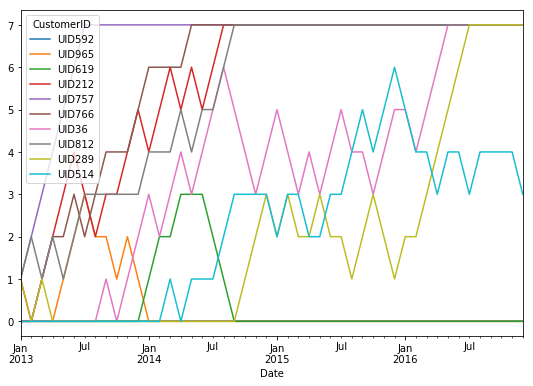

In [29]:
customer_df.pivot(index="Date",
                  columns="CustomerID",
                  values="State").sample(10, axis=1).plot(figsize=(9,6))

In [25]:
customer_df["State"] = customer_df["State_clip"]
customer_df[["CustomerID", "Date", "State"]].to_csv("./customer_state_data.csv")

In [20]:
customer_df["Next_State"] = customer_df.groupby(["CustomerID"])["State_clip"].shift(-1)
customer_df

,CustomerID,Date,Jump,State,State_clip,Next_State
0,UID0,2015-01-31,-1,-1,0,0.0
1,UID0,2015-02-28,0,-1,0,0.0
2,UID0,2015-03-31,0,-1,0,0.0
3,UID0,2015-04-30,0,-1,0,0.0
4,UID0,2015-05-31,-1,-2,0,0.0
5,UID0,2015-06-30,-1,-3,0,0.0
6,UID0,2015-07-31,0,-3,0,0.0
7,UID0,2015-08-31,-1,-4,0,0.0
8,UID0,2015-09-30,0,-4,0,0.0
9,UID0,2015-10-31,1,-3,0,0.0


## The average customer

We can estimate the average probability transition matrix from the data

$$P= \left( \begin{array}{cc}
Q & R \\
0 & I_r \end{array} \right)$$

In [21]:
P_avg = pd.crosstab(customer_df["State_clip"], customer_df["Next_State"], normalize=0)
P_avg

Next_State,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
State_clip,,,,,,,,
0,0.930989,0.069011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.289948,0.338807,0.371245,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.266990,0.354369,0.378641,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.241923,0.326071,0.432006,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.223867,0.337650,0.438483,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.234234,0.335907,0.429858,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.174497,0.297539,0.527964
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


This has the mechanics of a Markov chain 

<img src="./markov_chain.png",style="width: 800px;">

### The expected number of steps from state $i$ to state $j$

Let  $p_{i,j}$  be the probability of transitioning from  $i$  to  $j$ . Note that the  $(i,j)$th  element of the transition matrix is just  $p_{i,j}$ . Let  $N_i$  be the expected number of steps to reach an absorbing state from state  $i$ . Then $N_i$  must satisfy the equation:

$$N_i = 1+\sum_{j=0}^np_{i,j}N_j$$

It means that the state $i$ is in average one step further than the next state $j$. Note that this is true if $i$ and $j$ are not absorbing states. 

In matrix notation we get:

\begin{eqnarray}
N &=& \mathbf{1}+QN \\
\Rightarrow (I-Q)N&=&\mathbf{1}\\
\end{eqnarray}
$\mathbf{1}$ is a column vector of all  1's. Therefore we have

$$\Rightarrow N=(I-Q)^{-1}\mathbf{1}$$

In [22]:
from numpy.linalg import pinv
N = pd.DataFrame(
    pinv(
        np.eye(P_avg.shape[0]-1) - P_avg.iloc[:-1,:-1]
    )
)

N.loc[7,] = 0
N = N.sum(1)
N

0    67.485138
1    52.994656
2    38.983752
3    26.463242
4    17.136974
5    10.094871
6     3.931210
7     0.000000
dtype: float64

## How to estimate the probability transition matrix for a specific customer

### Laplace smoothing

Orginal average probability to go from $i$ to $j$: $p_{ij}$

Naive estimation of a probability: 
$$p_{ij}=\frac{\sum_{k=1}^m1_{\{s=i,f=j\}}}{m},$$
$m$ being the number of times the process started in $i$.

To get an estimation of a probability transition even if a customer never took the $i\rightarrow j$ path

Customer $C$:              
$$p_{ij}^C= \frac{\sum_{k=1}^m1_{\{s=i,f=j\}} + 1}{m + 1/p_{ij}}$$


In [23]:
def get_adjusted_P(df, P_original):
    
    cross_cust = pd.DataFrame(pd.crosstab(df["State_clip"], df["Next_State"]),
                          index=range(8),
                          columns=range(8)).fillna(0)
    
    number = pd.DataFrame(np.ones([8,8])).apply(lambda r: r*cross_cust.sum(1), axis=0)
    P_spe = ((cross_cust + 1)/(number + 1/P_original)).apply(lambda r: r/r.sum(), axis=1)
    N = pd.DataFrame(pinv(np.eye(P_spe.shape[0]-1) - P_spe.iloc[:-1,:-1]))
    N.loc[7,] = 0
    
    return P_spe, N.sum(1)

In [68]:
df = customer_df.loc[customer_df["CustomerID"] == "UID340"]

P_spe, N = get_adjusted_P(df, P_avg)
N

0    37.985572
1    23.495091
2    15.597342
3    10.707537
4     7.398442
5     4.691501
6     2.103250
7     0.000000
dtype: float64

In [69]:
df

,CustomerID,Date,Jump,State,State_clip,Next_State
6456,UID340,2015-01-31,1,1,1,2.0
6457,UID340,2015-02-28,1,2,2,3.0
6458,UID340,2015-03-31,1,3,3,4.0
6459,UID340,2015-04-30,1,4,4,5.0
6460,UID340,2015-05-31,1,5,5,6.0
6461,UID340,2015-06-30,1,6,6,7.0
6462,UID340,2015-07-31,1,7,7,7.0
6463,UID340,2015-08-31,1,8,7,7.0
6464,UID340,2015-09-30,1,9,7,7.0
6465,UID340,2015-10-31,1,10,7,7.0


## Probability to probability to reach state 7 in $n$ months

Probability transition matrix after n steps:

$$P^{(n)}=P^n$$

Probability to  to reach state 7 within $n$ months from a state $i$:

$$p_{i7,n}= p_{i7}^{(1)} +  (1-p_{i7}^{(1)})p_{i7}^{(2)} + \ldots +   (1-p_{i7}^{(1)})\ldots(1-p_{i7}^{(n-1)})p_{i7}^{(n)}$$
$$p_{i7,n}= p_{i7} + \sum_{k=2}^np_{i7}^{(k)}\prod_{l=1}^{k-1}1-p_{i7}^{(l)}$$
$$p_{i7,n}= p_{i7,n-1} + p_{i7}^{(n)}\prod_{l=0}^{n-1}1-p_{i7}^{(l)}$$

In [70]:
from numpy import linalg as LA

def get_P_n(P, n):
    P_list = np.array([pd.DataFrame(LA.matrix_power(P, i + 1))[7] for i in range(n)])
    P_cum_prod = np.cumprod([1 - P for P in P_list[:-1]], 0)
    return pd.Series(P_list[0] + (P_list[1:] * P_cum_prod).sum(0))
                            
df = customer_df.loc[customer_df["CustomerID"] == "UID6"]

P_spe, N = get_adjusted_P(df, P_avg)                            
get_P_n(P_spe, 10)

0    0.009511
1    0.083857
2    0.233319
3    0.561705
4    0.920985
5    0.995424
6    1.000000
7    1.000000
dtype: float64

In [73]:
df = customer_df.loc[customer_df["CustomerID"] == "UID1"]

P_spe, N = get_adjusted_P(df, P_avg)                            
get_P_n(P_spe, 24)

0    0.471340
1    0.840208
2    0.999114
3    0.999999
4    1.000000
5    1.000000
6    1.000000
7    1.000000
dtype: float64

In [80]:
def get_proba(x):
    P_spe, _ = get_adjusted_P(x, P_avg)
    return get_P_n(P_spe, 24)[0]
    

result = customer_df.groupby("CustomerID").apply(lambda x: pd.Series([get_proba(x), x["State_clip"].max()], 
                                                            index=["Proba", "Max_state"]))

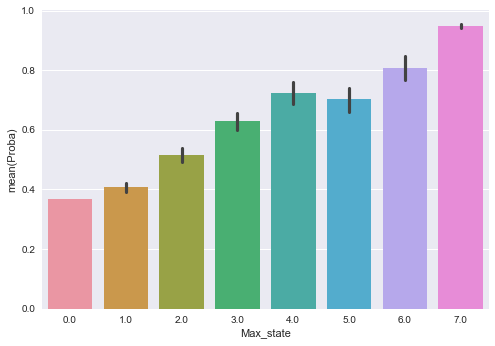

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Max_state", y="Proba", data=result)

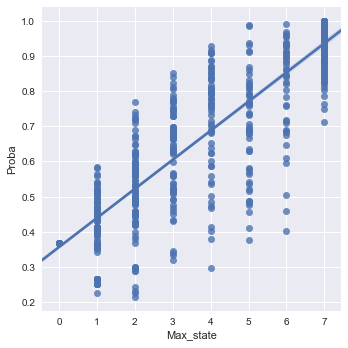

In [82]:
sns.lmplot(x="Max_state", y="Proba", data=result)